<a href="https://colab.research.google.com/github/yuma-py/test/blob/main/Stock_price_tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# データセットの読み込み
df = pd.read_csv('drive/My Drive/data/1419_2020.csv',
    encoding='Shift_JIS')

In [ ]:
df

,1419 東証1部 タマホーム(株)（建設業）,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
日付,始値,高値,安値,終値,出来高,終値調整値
2020-01-06,1625,1634,1605,1623,306300,1623
2020-01-07,1610,1643,1608,1625,252600,1625
2020-01-08,1612,1618,1544,1558,585600,1558
2020-01-09,1563,1568,1518,1520,492200,1520
...,...,...,...,...,...,...
2020-08-21,1250,1262,1241,1249,140400,1249
2020-08-24,1251,1267,1247,1257,189600,1257
2020-08-25,1269,1273,1253,1259,171200,1259
2020-08-26,1260,1269,1252,1269,128800,1269


In [ ]:
# データセットの読み込み（header除去)
df_ = pd.read_csv('drive/My Drive/data/1419_2020.csv',
    encoding='Shift_JIS',header=1)

In [ ]:
df_

,日付,始値,高値,安値,終値,出来高,終値調整値
0,2020-01-06,1625,1634,1605,1623,306300,1623
1,2020-01-07,1610,1643,1608,1625,252600,1625
2,2020-01-08,1612,1618,1544,1558,585600,1558
3,2020-01-09,1563,1568,1518,1520,492200,1520
4,2020-01-10,1531,1543,1510,1520,528200,1520
...,...,...,...,...,...,...,...
149,2020-08-21,1250,1262,1241,1249,140400,1249
150,2020-08-24,1251,1267,1247,1257,189600,1257
151,2020-08-25,1269,1273,1253,1259,171200,1259
152,2020-08-26,1260,1269,1252,1269,128800,1269


In [ ]:
df2_=df_.drop(columns=['出来高','終値調整値'])
df2_

,日付,始値,高値,安値,終値
0,2020-01-06,1625,1634,1605,1623
1,2020-01-07,1610,1643,1608,1625
2,2020-01-08,1612,1618,1544,1558
3,2020-01-09,1563,1568,1518,1520
4,2020-01-10,1531,1543,1510,1520
...,...,...,...,...,...
149,2020-08-21,1250,1262,1241,1249
150,2020-08-24,1251,1267,1247,1257
151,2020-08-25,1269,1273,1253,1259
152,2020-08-26,1260,1269,1252,1269


In [ ]:
# 入力変数と目的変数の切り分け
t = df2_['終値'].values
x = df2_.drop(labels=['日付'], axis=1).values
t

array([1623, 1625, 1558, 1520, 1520, 1540, 1418, 1429, 1427, 1426, 1419,
       1414, 1384, 1377, 1338, 1349, 1335, 1291, 1293, 1305, 1307, 1448,
       1445, 1441, 1404, 1427, 1456, 1431, 1441, 1423, 1429, 1415, 1391,
       1371, 1370, 1321, 1266, 1321, 1280, 1276, 1264, 1225, 1102, 1126,
       1081, 1030,  928,  940,  980,  998,  982, 1062, 1065, 1162, 1167,
       1232, 1227, 1221, 1120, 1072, 1020, 1074, 1123, 1115, 1150, 1177,
       1184, 1206, 1150, 1145, 1173, 1194, 1171, 1142, 1163, 1160, 1178,
       1210, 1260, 1269, 1280, 1310, 1380, 1386, 1404, 1354, 1341, 1349,
       1372, 1395, 1403, 1427, 1465, 1477, 1454, 1383, 1304, 1250, 1245,
       1252, 1203, 1268, 1312, 1315, 1296, 1230, 1254, 1191, 1255, 1259,
       1243, 1275, 1267, 1361, 1310, 1302, 1234, 1227, 1196, 1186, 1187,
       1220, 1214, 1213, 1204, 1170, 1144, 1145, 1150, 1173, 1186, 1177,
       1189, 1170, 1167, 1144, 1086, 1129, 1169, 1162, 1183, 1190, 1227,
       1240, 1264, 1253, 1244, 1257, 1245, 1249, 12

In [ ]:
#前日の始値とかで次の日の終値を求めたいので最後の入力値と最初の終値を削除する
#3番目の引数は次元（軸）を対象としている。つまり行（0）か列（1）
t_del=np.delete(t,0,0)
x_del=np.delete(x,153,0)

In [ ]:
from sklearn.model_selection import train_test_split
train0, test0, train1, test1 = train_test_split(x_del, t_del, test_size=0.2,shuffle=False)


In [ ]:
train0.dtype

dtype('int64')

In [ ]:
# 学習用データセット
x_train = np.array(train0, np.float32)
t_train = np.array(train1, np.int32)

# テスト用データセット
x_test = np.array(test0, np.float32)
t_test = np.array(test1, np.uint32)
x_train

array([[1625., 1634., 1605., 1623.],
       [1610., 1643., 1608., 1625.],
       [1612., 1618., 1544., 1558.],
       [1563., 1568., 1518., 1520.],
       [1531., 1543., 1510., 1520.],
       [1545., 1548., 1517., 1540.],
       [1501., 1536., 1386., 1418.],
       [1438., 1448., 1415., 1429.],
       [1442., 1444., 1402., 1427.],
       [1425., 1427., 1407., 1426.],
       [1427., 1430., 1408., 1419.],
       [1416., 1423., 1401., 1414.],
       [1403., 1403., 1371., 1384.],
       [1385., 1394., 1360., 1377.],
       [1345., 1364., 1338., 1338.],
       [1325., 1352., 1315., 1349.],
       [1333., 1339., 1317., 1335.],
       [1318., 1329., 1288., 1291.],
       [1282., 1308., 1280., 1293.],
       [1263., 1308., 1256., 1305.],
       [1287., 1311., 1278., 1307.],
       [1597., 1599., 1414., 1448.],
       [1470., 1479., 1435., 1445.],
       [1445., 1461., 1430., 1441.],
       [1432., 1432., 1403., 1404.],
       [1406., 1427., 1386., 1427.],
       [1420., 1457., 1403., 1456.],
 

In [ ]:
x_test.dtype, x_test.shape

(dtype('float32'), (31, 4))

In [ ]:
import os, random

def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
#シードを固定する理由は毎回学習した際に誤差が起こる理由がランダムに設定した理由にならないため

In [ ]:
# シードの固定
reset_seed(0)

# モデルの定義（Sequential API（初心者向けを使用）
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(4, )),
    #ノード数32の中間層を作成。活性化関数としてReLuを用いる。入力してくる数は4
    tf.keras.layers.Dense(1),
     #最後の出力は1
])

# モデルのコンパイル
model.compile(optimizer='adam', #どうやって学習を最適化するかを決定
              #Optimaizer=最適化アルゴリズム:データや損失関数に基づいて、
              #どのようにモデルが更新されて行くかを決める。
              #w=w-?みたいなやつのこと
              loss='mse',#どうやって損失を定義するかを決定
              metrics=['mae'])
              #メトリックはとりあえずaccuracy（分類問題は）を選んでおけば良い
              #Metrics=評価関数のリスト：評価関数はモデルの性能を測るために用いる。
              #この評価結果が訓練にフィードバックされることはない。

Kerasを使用すると、ディープラーニングのベースとなっている数学的理論の部分をゼロから開発せずとも、比較的短いソースコードで実装することができます。TensorFlow：Googleが開発した機械学習のライブラリ。

 model=tf.keras.Sequential()でインスタンス化して、model.add()メソッドでひたすら層を積んでいく方式。2行目のtf.keras.layers.Denseでは、二層目のHidden Layerを定義しており、活性化関数のreluを選んで、データ数4であることを示している

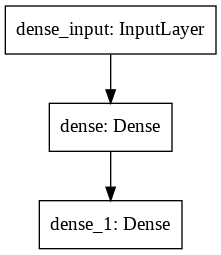

In [ ]:
# モデル構造の可視化
tf.keras.utils.plot_model(model)
#Dendeは全結合を表す

バッチサイズ・イテレーション

データが100個あったとき20個*5ずつに分けたときは
バッチサイズは20となる

イテレーションは学習するデータが必ず一回は使われる多目の回数であり20個に分けたデータを100個まで使うには5回繰り返さなければならないので
イテレーションは5となる

エポック
エポックは全てのデータを使用したときに1回となるので

1エポック＝5イテレーション



In [ ]:
# モデルの学習
history = model.fit(x_train, t_train, 
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_test, t_test))
                    #エポック数とは「一つの訓練データを何回繰り返して学習させるか」の回数を示す。
                    #検証データのパフォーマンスをモニタリングするために、(入力値, 目標値) のタプルを渡すと各エポック終わりに渡された推論モードで loss と metrics の値を表示します
                    

Epoch 1/30
4/4 [==============================] - 0s 34ms/step - loss: 1775923.6250 - mae: 1325.1522 - val_loss: 1411584.7500 - val_mae: 1186.7117
Epoch 2/30
4/4 [==============================] - 0s 6ms/step - loss: 1527244.6250 - mae: 1228.9567 - val_loss: 1207670.3750 - val_mae: 1097.5782
Epoch 3/30
4/4 [==============================] - 0s 5ms/step - loss: 1304828.8750 - mae: 1135.0356 - val_loss: 1023451.4375 - val_mae: 1010.3194
Epoch 4/30
4/4 [==============================] - 0s 5ms/step - loss: 1099320.3750 - mae: 1042.2246 - val_loss: 859376.5000 - val_mae: 925.6990
Epoch 5/30
4/4 [==============================] - 0s 5ms/step - loss: 917369.5000 - mae: 952.1381 - val_loss: 712952.8750 - val_mae: 843.0405
Epoch 6/30
4/4 [==============================] - 0s 5ms/step - loss: 757326.8125 - mae: 864.7823 - val_loss: 583669.7500 - val_mae: 762.6473
Epoch 7/30
4/4 [==============================] - 0s 5ms/step - loss: 615725.0625 - mae: 779.6711 - val_loss: 471229.4688 - val_mae: 

In [ ]:
# 学習済みモデルの評価
score = model.evaluate(x_test, t_test)
score

1/1 [==============================] - 0s 1ms/step - loss: 1116.1393 - mae: 20.8482


[1116.1392822265625, 20.848234176635742]

In [ ]:
print(history.history)

{'loss': [1775923.625, 1527244.625, 1304828.875, 1099320.375, 917369.5, 757326.8125, 615725.0625, 493707.15625, 389239.09375, 301418.78125, 228808.78125, 170636.453125, 124275.2421875, 87999.7890625, 60859.0546875, 40964.203125, 26568.03125, 16938.513671875, 10469.7626953125, 6390.75732421875, 4121.48876953125, 2844.123291015625, 2216.327392578125, 1971.9403076171875, 1911.214111328125, 1912.3829345703125, 1956.8870849609375, 1978.3948974609375, 1983.2476806640625, 1978.3463134765625], 'mae': [1325.1522216796875, 1228.9566650390625, 1135.03564453125, 1042.224609375, 952.1380615234375, 864.7823486328125, 779.6710815429688, 697.9318237304688, 619.4207763671875, 544.852783203125, 474.60748291015625, 409.20611572265625, 348.6152648925781, 292.7846374511719, 242.3082733154297, 197.0476531982422, 157.236328125, 122.74759674072266, 94.19183349609375, 71.24652862548828, 54.680599212646484, 43.9879264831543, 37.36579513549805, 33.805965423583984, 32.47135925292969, 32.46684265136719, 32.7921333

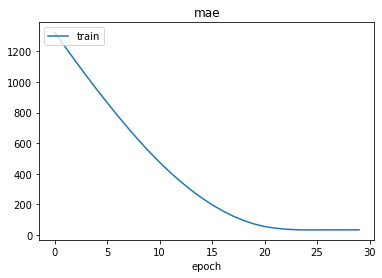

In [ ]:
plt.plot(history.history['mae'])
plt.title('mae')
#plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
x[153]

array([1398, 1411, 1385, 1411])

In [ ]:
x_t = np.array(x[153], np.float32)
x_t

array([1398., 1411., 1385., 1411.], dtype=float32)

In [ ]:
y=model.predict(x_test)

In [ ]:
t_test

array([1213, 1204, 1170, 1144, 1145, 1150, 1173, 1186, 1177, 1189, 1170,
       1167, 1144, 1086, 1129, 1169, 1162, 1183, 1190, 1227, 1240, 1264,
       1253, 1244, 1257, 1245, 1249, 1257, 1259, 1269, 1411], dtype=uint32)

In [ ]:
print('予測値: ', y[0])
print('目標値: ', t_test[0])


予測値:  [1223.016]
目標値:  1213


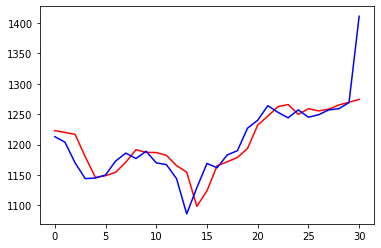

In [ ]:
plt.plot(y, color = "red")
plt.plot(ｔ_test,color = "blue")

In [ ]:
y2 = model.predict(x_train)

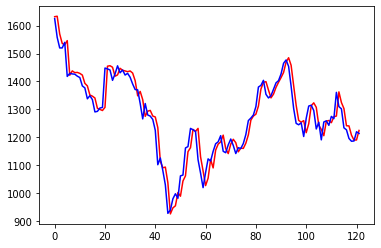

In [ ]:
plt.plot(y2, color = "red")
plt.plot(ｔ_train,color = "blue")

評価指標

タスクにおけるモデルの性能を測る指標

目的関数

モデルの学習をする際に最適化する関数


目的関数には微分できる必要があるなどの制約がある

そのため評価指標都目的関数を異なるものにすることがある

つまり目的関数が離散的な関数だと重みであるｗを少し変化させたとき変わらないため最適化しにくい

時系列データの処理

交差検証だと未来のデータを用いて過去のデータを検証するケースがあるので有効ではない

年間を通した学習・検証になっていないため、季節によって変動する傾向を正確に捉えることができません。そのため、このような学習・検証を行なう場合は、使用するデータが通年になるよう長い期間のデータが必要になると著者は述べています。